In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv(r"D:\DATASETS\Classification-Datasets\Kmeans\income.csv")

In [7]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [8]:
df.shape

(22, 3)

In [9]:
df.drop("Name", axis = 1)

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [10]:
df.drop("Name", axis = 1, inplace = True)

In [11]:
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [14]:
df.columns = ['Age', 'Income']

In [15]:
df

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


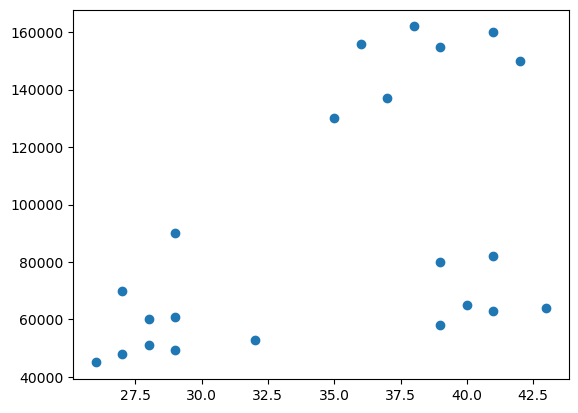

In [16]:
plt.scatter(df["Age"], df["Income"])
plt.show()

In [17]:
for i in range(1, 11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [19]:
import warnings

In [20]:
warnings.filterwarnings("ignore")

In [21]:
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wc = km.inertia_
    print(wc)

39748148458.545456
3318233941.161905
1606229737.6785715
814746044.2545455
1001633685.9619046
240467079.12857142
183717018.28333336
160833588.6666667
96300255.03333333
74966931.61666666


In [22]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wc = km.inertia_
    wcss.append(wc)

print(wcss)

[39748148458.545456, 3318233941.161905, 1577046058.8831167, 843929723.05, 296500418.0952381, 267033780.8, 217550406.2952381, 129716937.61666666, 95133611.78333333, 76133574.86666667]


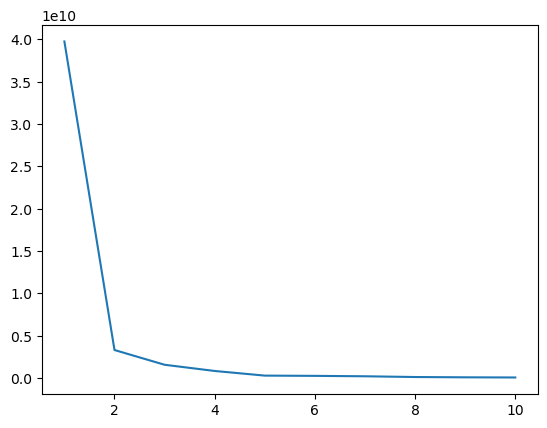

In [23]:
plt.plot(range(1,11), wcss)
plt.show()

In [25]:
data = df.values

In [26]:
km2 = KMeans(n_clusters=2)

In [27]:
ypred = km2.fit_predict(df)

In [28]:
ypred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

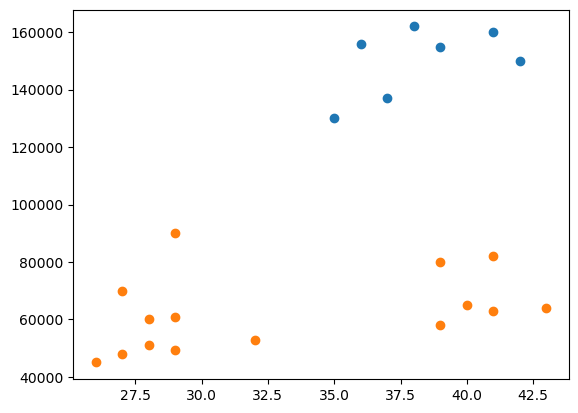

In [30]:
plt.scatter(data[ypred == 0,0], data[ypred == 0,1])
plt.scatter(data[ypred == 1,0], data[ypred == 1,1])
plt.show()

### Applying the Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms = MinMaxScaler()

In [34]:
mms.fit(df[["Age"]])

MinMaxScaler()

In [37]:
df["Age"]

0     27
1     29
2     29
3     28
4     42
5     39
6     41
7     38
8     36
9     35
10    37
11    26
12    27
13    28
14    29
15    32
16    40
17    41
18    43
19    39
20    41
21    39
Name: Age, dtype: int64

In [36]:
mms.transform(df[["Age"]])

array([[0.05882353],
       [0.17647059],
       [0.17647059],
       [0.11764706],
       [0.94117647],
       [0.76470588],
       [0.88235294],
       [0.70588235],
       [0.58823529],
       [0.52941176],
       [0.64705882],
       [0.        ],
       [0.05882353],
       [0.11764706],
       [0.17647059],
       [0.35294118],
       [0.82352941],
       [0.88235294],
       [1.        ],
       [0.76470588],
       [0.88235294],
       [0.76470588]])

In [38]:
df["Age"] = mms.transform(df[["Age"]])

In [39]:
df

,Age,Income
0,0.058824,70000
1,0.176471,90000
2,0.176471,61000
3,0.117647,60000
4,0.941176,150000
5,0.764706,155000
6,0.882353,160000
7,0.705882,162000
8,0.588235,156000
9,0.529412,130000


In [42]:
mms.fit(df[["Income"]])

MinMaxScaler()

In [43]:
mms.transform(df[["Income"]])

array([[0.21367521],
       [0.38461538],
       [0.13675214],
       [0.12820513],
       [0.8974359 ],
       [0.94017094],
       [0.98290598],
       [1.        ],
       [0.94871795],
       [0.72649573],
       [0.78632479],
       [0.        ],
       [0.02564103],
       [0.05128205],
       [0.03846154],
       [0.06837607],
       [0.17094017],
       [0.15384615],
       [0.16239316],
       [0.2991453 ],
       [0.31623932],
       [0.11111111]])

In [44]:
df["Income"] = mms.transform(df[["Income"]])

In [45]:
df.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [46]:
for x in range(1,11):
    km = KMeans(n_clusters=x)
    km.fit_predict(df)
    wc = km.inertia_
    print(wc)

5.434011511988179
2.3456144914725936
0.4750783498553096
0.34910470944195654
0.3071350418475292
0.25373386131082887
0.22399854735051264
0.1669589194819876
0.12861136577976257
0.10140613431692308


In [48]:
wcss1 = []
for x in range(1,11):
    km = KMeans(n_clusters=x)
    km.fit_predict(df)
    wc = km.inertia_
    wcss1.append(wc)

print(wcss1)

[5.434011511988179, 2.3456144914725936, 0.4750783498553096, 0.40365551195705296, 0.3071350418475292, 0.25014078658109806, 0.1872110416575564, 0.14513558681778013, 0.11790807312684995, 0.08510915216361345]


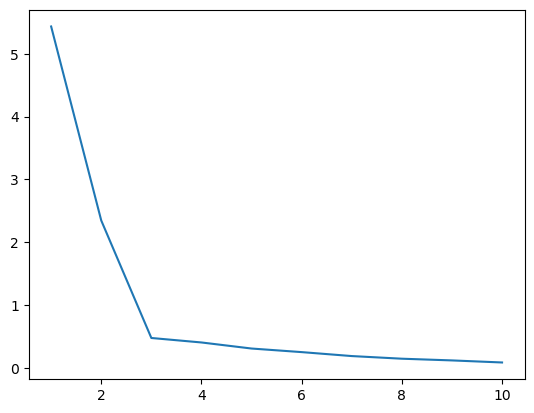

In [49]:
plt.plot(range(1,11), wcss1)
plt.show()

In [56]:
data1 = df.values

In [50]:
km3 = KMeans(n_clusters=3)

In [52]:
ypred3 = km3.fit_predict(df)

In [53]:
ypred3

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [54]:
ypred3 == 0

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False])

In [57]:
data1[ypred3 == 0]

array([[0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 0.94871795],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479]])

In [58]:
data1[ypred3 == 1]

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607]])

In [59]:
data1[ypred3 == 2]

array([[0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

In [60]:
data1[ypred3 == 0,0]

array([0.94117647, 0.76470588, 0.88235294, 0.70588235, 0.58823529,
       0.52941176, 0.64705882])

In [61]:
data1[ypred3 == 0, 1]

array([0.8974359 , 0.94017094, 0.98290598, 1.        , 0.94871795,
       0.72649573, 0.78632479])

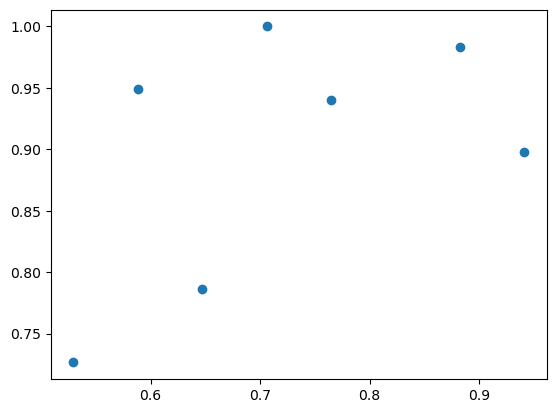

In [62]:
plt.scatter(data1[ypred3 == 0,0], data1[ypred3 == 0,1])

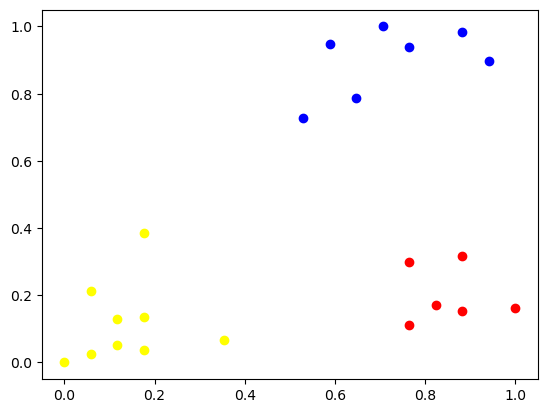

In [63]:
plt.scatter(data1[ypred3 == 0,0], data1[ypred3 == 0,1], color = "blue")
plt.scatter(data1[ypred3 == 1,0], data1[ypred3 == 1,1], color = "yellow")
plt.scatter(data1[ypred3 == 2,0], data1[ypred3 == 2,1], color = "red")
plt.show()